<h1>Softverska analiza društvenih mreža - Mreža saradnje glumaca nominovanih za Oskara u periodu od 1972. do 2022. godine</h1>

<h2>Metodologija</h2>

Analize konkretnih setova podataka imaju za cilj da istraže strukturu saradnje između glumaca i glumica koji su bili nominovani za prestižnu filmsku nagradu Oskar u periodu od 1972. do 2022. godine. Koristeći metode analize društvenih mreža (eng. <i>Social Network Analysis)</i>, modelovaće se odnosi među glumcima u pogledu grafa, gde će se glumci predstavljati na čvorovima, a zajednički broj saradnji će biti beležen na granama između njih.
Istraživačka pitanja na koja želimo da odgovorimo su:
1. Koji su centralni akteri u mreži i kako se meri njihova centralnost?
2. Da li postoji statistički značajna veza između centralnosti glumca u mreži i njegovog uspeha (osvajanja Oskara)?
3. Kakva je struktura povezanosti u mreži?
4. Na koji način će se identifikovati zajednice glumaca koji najčešće sarađuju?

Pomoću ovih pitanja moći će da se kvantifikuju i vizuelizuju odnosi saradnje i otkriju obrasci u relacijama.

<h3>Priprema okuženja i podataka</h3>

Korišćen je ‘Oscar nominations and filmographies since 1972’ dataset preuzet sa Kaggle sajta (Oscar nominations and filmographies since 1972). Ovaj dataset se sastoji od dva csv fajla: filmographies.csv I nomination_stats.csv. 

Neophodno je da se instaliraju potrebni paketi, tj. network biblioteka i da se učitaju dva skupa podataka koji će se analizirati.

In [84]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [85]:
filmographies = pd.read_csv('filmographies.csv')
nominations = pd.read_csv('nomination_stats.csv')

U fajlu `filmographies` se nalaze podaci o nazivu, godini objavljivanja i tipu filma, kao i o imenu i poziciji (glumac, režiser, pisac…) osobe koja je učestvovala u kreiranju filma. Fajl `nomination_stats` sadrži podatke o imenima nominovanih glumaca, kategorijama i godinama kada su nominovani, kao i ishodu nominacije (da li je dobitnik ili ne).

In [86]:
filmographies.head()

name    name_id                             title   title_id  \
0  Richard Harris  nm0001321  Today Mexico, Tomorrow the World  tt8682736   
1   Ellen Burstyn  nm0000995        The King of Marvin Gardens  tt0068805   
2   Paul Winfield  nm0934902                       Trouble Man  tt0069414   
3   Paul Winfield  nm0934902                           Sounder  tt0069303   
4   Adolph Caesar  nm0128360                            Hammer  tt0068673   

   year   kind position  
0  1972  movie     self  
1  1972  movie  actress  
2  1972  movie    actor  
3  1972  movie    actor  
4  1972  movie    actor

In [87]:
filmographies['position'].unique()

array(['self', 'actress', 'actor', 'writer', 'soundtrack', 'producer',
       'archive footage', 'stunts', 'director', 'music department',
       'additional crew', 'composer', 'thanks', 'casting director',
       'art department', 'costume designer', 'editor',
       'costume and wardrobe department',
       'script and continuity department',
       'second unit director or assistant director',
       'camera and electrical department', 'casting department',
       'cinematographer', 'sound department', 'editorial department',
       'makeup department', 'transportation department',
       'location management', 'animation department', 'art director'],
      dtype=object)

In [88]:
filmographies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76034 entries, 0 to 76033
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      76034 non-null  object
 1   name_id   76034 non-null  object
 2   title     76034 non-null  object
 3   title_id  76034 non-null  object
 4   year      76034 non-null  int64 
 5   kind      76034 non-null  object
 6   position  76034 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.1+ MB


In [89]:
nominations.head()

name    name_id                           category  year  \
0  Margaret Leighton  nm0500364  Best Actress in a Supporting Role  1972   
1    George C. Scott  nm0001715       Best Actor in a Leading Role  1972   
2        Peter Finch  nm0002075       Best Actor in a Leading Role  1972   
3              Topol  nm0867694       Best Actor in a Leading Role  1972   
4     Walter Matthau  nm0000527       Best Actor in a Leading Role  1972   

   outcome  
0  nominee  
1  nominee  
2  nominee  
3  nominee  
4  nominee

In [90]:
nominations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      1200 non-null   object
 1   name_id   1200 non-null   object
 2   category  1200 non-null   object
 3   year      1200 non-null   int64 
 4   outcome   1200 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB


In [91]:
nominations['category'].unique()

array(['Best Actress in a Supporting Role',
       'Best Actor in a Leading Role', 'Best Actor in a Supporting Role',
       'Best Actress in a Leading Role',
       'Best Performance by an Actress in a Leading Role',
       'Best Performance by an Actor in a Leading Role',
       'Best Performance by an Actress in a Supporting Role',
       'Best Performance by an Actor in a Supporting Role'], dtype=object)

Nakon učitavanja fajlova u Python skriptu i analize varijabli koje se nalaze u njima, kreiran je graf koji će se koristiti za prikazivanje glumaca i njihovih međusobnih saradnji. Iz dataseta filmographies izdvojene su osobe čija je pozicija na filmu glumac/glumica. U čvorovima grafa se nalaze <b>imena glumaca</b>, <b>broj filmova u kojima su glumili</b>, <b>broj nominacija</b> i <b>broj osvojenih nagrada</b>. 

Granama su povezani glumci koji su glumili u istom filmu, <b>dok težine grana predstavljaju broj filmova u kojima su ti parovi zajedno glumili</b>. Graf je neorijentisan, sadrži 546 čvorova i 19143 grana.

In [92]:
# Kreiranje grafa saradnje glumaca
G = nx.Graph()

In [93]:
# Dodavanje čvorova za sve glumce
actors_df = filmographies[filmographies['position'].isin(['actor', 'actress'])] # izdvajanje glumaca
actors = actors_df['name'].unique()
print(f"Broj glumaca: {len(actors)}")

G.add_nodes_from(actors)

Broj glumaca: 546


In [94]:
# Dodavanje atributa num_films u čvorove
num_films = actors_df.groupby('name').size()
for node in G.nodes():
    G.nodes[node]['num_films'] = num_films.get(node, 0)

In [95]:
# Dodavanje atributa num_nominations u čvorove
num_nominations = nominations.groupby('name').size().to_dict()
for node in G.nodes():
    G.nodes[node]['num_nominations'] = num_nominations.get(node, 0)

In [96]:
# Dodavanje atributa num_awards u čvorove
winners = nominations[nominations['outcome'] == 'winner']
num_awards = winners.groupby('name').size().to_dict()
for node in G.nodes():
    G.nodes[node]['num_awards'] = num_awards.get(node, 0)

In [97]:
list(G.nodes(data=True))[:10]

[('Ellen Burstyn', {'num_films': 104, 'num_nominations': 6, 'num_awards': 1}),
 ('Paul Winfield', {'num_films': 77, 'num_nominations': 1, 'num_awards': 0}),
 ('Adolph Caesar', {'num_films': 14, 'num_nominations': 1, 'num_awards': 0}),
 ('Robert Downey Jr.',
  {'num_films': 85, 'num_nominations': 2, 'num_awards': 0}),
 ('Maureen Stapleton',
  {'num_films': 42, 'num_nominations': 3, 'num_awards': 1}),
 ('Dustin Hoffman', {'num_films': 61, 'num_nominations': 7, 'num_awards': 2}),
 ('Louis Gossett Jr.',
  {'num_films': 132, 'num_nominations': 2, 'num_awards': 1}),
 ('Joel Grey', {'num_films': 30, 'num_nominations': 2, 'num_awards': 1}),
 ('Bruce Dern', {'num_films': 117, 'num_nominations': 2, 'num_awards': 0}),
 ('Kathleen Quinlan',
  {'num_films': 78, 'num_nominations': 1, 'num_awards': 0})]

In [98]:
# Dodavanje grana između glumaca koji su glumili u istom filmu
for title_id, group in actors_df.groupby('title_id'):
    actor_list = group['name'].tolist()
    for i in range(len(actor_list)):
        for j in range(i+1, len(actor_list)):
            if G.has_edge(actor_list[i], actor_list[j]):
                G[actor_list[i]][actor_list[j]]['weight'] += 1
            else:
                G.add_edge(actor_list[i], actor_list[j], weight=1)

print("Broj čvorova:", G.number_of_nodes())
print("Broj grana:", G.number_of_edges())

Broj čvorova: 546
Broj grana: 19143


<h3>Analiza centralnosti</h3>
Centralnost je ključni koncept u analizi mreža i pomaže da se identifikuju najvažniji čvorovi. Korišćene su četiri mere:

1. <b>Degree Centrality (Stepen centralnosti)</b> - meri se i izračunava broj veza koje čvor ima. U pogledu ovog projekta, meri se sa koliko klumaca je svaki glumac sarađivao. GLumac sa visokim stepenom centralnosti ima veliki broj saradnji, što znači da je njegova "konektivnost" sa ostalim glumcima visoka.
2. <b>Betweenness Centrality (Posrednička centralnost)</b> - meri koliko često je čvor bio "most" informacijama na najkraćem putu između druga dva čvora, tj. koliko često je povezivao različite grupe glumaca koji inače ne bi bili povezani.
3. <b>Closeness Centrality (Centralnost bliskosti)</b> - meri se prosečna udaljenost čvora od svih ostalih čvorova u mreži. Glumac koji ima najvišu vrednost znači da može brzo da "dopre" do ostalih glumaca u mreži.
4. <b>Eigenvector Centrality (Centralnost uticaja)</b> - meri uticaj čvora po principu da su veze uticajnijih čvorova važnije od veza glumaca koji su manje uticajni. Glumac je uticajan ako sarađuje sa drugim uticajnim glumcima.

<b>Korelaciona matrica</b> je značajna za ispitivanje odnosa između kontinuiranih mera centralnosti i broja filmova/nominacija. 

In [99]:
# Računanje centralnosti
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

In [100]:
# Broj filmova i nominacija po glumcu
num_films = actors_df.groupby('name').size()
num_nominations = nominations.groupby('name').size()

In [101]:
# Kreiranje DataFrame-a sa svim metrikama
actor_metrics = pd.DataFrame([
    {
        'actor': n,
        'degree': degree_centrality[n],
        'betweenness': betweenness_centrality[n],
        'closeness': closeness_centrality[n],
        'eigenvector': eigenvector_centrality[n],
        'num_films': G.nodes[n].get('num_films', 0),
        'num_nominations': G.nodes[n].get('num_nominations', 0),
        'num_awards': G.nodes[n].get('num_awards', 0)
    }
    for n in G.nodes()
])

print("Metrike glumaca:")
actor_metrics.head()

Metrike glumaca:


actor    degree  betweenness  closeness  eigenvector  \
0      Ellen Burstyn  0.245872     0.006627   0.565353     0.067253   
1      Paul Winfield  0.121101     0.001839   0.521531     0.025591   
2      Adolph Caesar  0.014679     0.000019   0.428459     0.003753   
3  Robert Downey Jr.  0.273394     0.004140   0.573081     0.082264   
4  Maureen Stapleton  0.082569     0.000704   0.506035     0.019666   

   num_films  num_nominations  num_awards  
0        104                6           1  
1         77                1           0  
2         14                1           0  
3         85                2           0  
4         42                3           1

In [102]:
# Korelacija metrika
corr = actor_metrics[['degree','betweenness','closeness','eigenvector','num_films','num_nominations']].corr()

print("Korelaciona matrica:")
corr

Korelaciona matrica:


degree  betweenness  closeness  eigenvector  num_films  \
degree           1.000000     0.882280   0.906424     0.992068   0.619339   
betweenness      0.882280     1.000000   0.730299     0.849231   0.591381   
closeness        0.906424     0.730299   1.000000     0.894373   0.583969   
eigenvector      0.992068     0.849231   0.894373     1.000000   0.582445   
num_films        0.619339     0.591381   0.583969     0.582445   1.000000   
num_nominations  0.366435     0.357015   0.317476     0.371852   0.057573   

                 num_nominations  
degree                  0.366435  
betweenness             0.357015  
closeness               0.317476  
eigenvector             0.371852  
num_films               0.057573  
num_nominations         1.000000

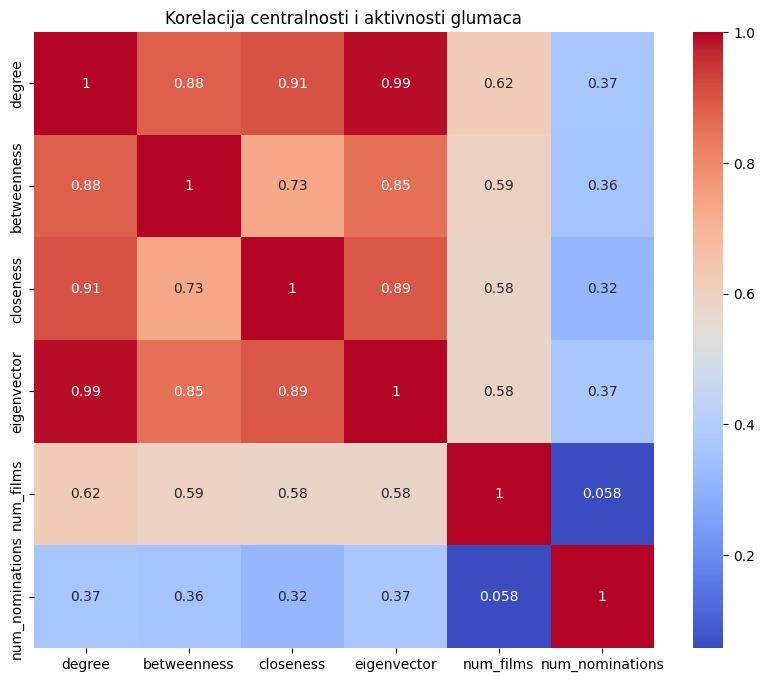

In [103]:
# Vizualizacija korelacije
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelacija centralnosti i aktivnosti glumaca")
plt.show()

Na osnovu izračunatih metrika za svakog glumca kreirana je korelaciona matrica sa ciljem da se proveri da li su različite mere centralnosti međusobno povezane i da li je položaj glumca u mreži povezan sa njegovim karijernim uspehom, tj. osvajanjem nagrade. Iz matrice se vidi da postoji snažna korelacija između mera centralnosti, pri čemu je najveća povezanost između degree i eigenvector vrednosti (0.99). To znači da glumci sa većim brojem veza u mreži ujedno imaju i veće vrednosti eigenvector centralnosti. Korelacija sa brojem filmova je umerena (0.58-0.62), što ukazuje ga glumci koji su centralniji u mreži obično imaju bogatu filmsku karijeru.

<h3>Statistička analiza centralnosti i osvajanja Oskara</h3>

Osvajanje Oskara je redak događaj: veliki broj glumaca je nominovan za nagradu, ali mali broj glumaca osvoji nagradu. Zbog toga se broj osvojenih Oskara u ovoj analizi posmatra kao <b>binarna promenljiva</b> (da li je glumac osvojio Oskara ili ne). 

Za ispitivanje veze između binarne promenljive `won_oscar` i mera centralnosti, korelaciona matrica nije najprikladniji alat, jer klasične mere korelacija (npr. Pearson) pretpostavljaju dva kontinuirana atributa i ne mogu adekvatno da procene asocijaciju u ovom tipu podataka.

Za potrebe projekta, primeniće se <b>Mann-Whitney U test</b>, neparametarska alternativa t-testa, koja ne zahteva normalnu distribuciju podataka i pogodna je za poređenje dve nezavisne grupe. Grupe koje se porede su:
1. Glumci koji su osvojili bar jednog Oskara `"won_oscar"=1`
2. GLumci koji nikada nisu osvojili Oskara `"won_oscar=0"`

<b>Nulta hipoteza (H$_0$)</b>: Ne postoji statistički značajna razlika u distribucijama vrednosti centralnosti (degree, betweenness, closeness, eigenvector) između glumaca koji su osvojili i onih koji nisu osvojili Oskara. 

<b>Alternativna hipoteza (H$_1$)</b>: Postoji statistički značajna razlika u distribucijama vrednosti centralnosti između ove dve grupe glumaca.

Ukoliko je p-vrednost manja od 0.05, nulta hipoteza se odbacuje i zaključuje se da su mere centralnosti povezane sa osvajanjem Oskara.

In [104]:
# Dodavanje binarne varijable 'won_oscar'
actor_metrics['won_oscar'] = actor_metrics['num_awards'].apply(lambda x: 1 if x > 0 else 0)

# Kreiranje dve grupe
oscar_winners = actor_metrics[actor_metrics['won_oscar'] == 1]
oscar_non_winners = actor_metrics[actor_metrics['won_oscar'] == 0]

print(f"Broj dobitnika Oskara u mreži: {len(oscar_winners)}")
print(f"Broj glumaca bez Oskara u mreži: {len(oscar_non_winners)}")

# Mere centralnosti koje testiramo
centrality_measures = ['degree', 'betweenness', 'closeness', 'eigenvector']

print("\n--- Mann-Whitney U Test: Centralnost vs. Osvajanje Oskara ---")

for measure in centrality_measures:
    # Poređenje distribucija za svaku meru centralnosti
    stat, p_value = mannwhitneyu(oscar_winners[measure], oscar_non_winners[measure], alternative='two-sided')
    
    print(f"\nTest za meru: {measure.capitalize()}")
    print(f"Medijana za dobitnike Oskara: {oscar_winners[measure].median():.4f}")
    print(f"Medijana za one koji nisu dobitnici: {oscar_non_winners[measure].median():.4f}")
    print(f"P-vrednost: {p_value:.4f}")
    
    # Interpretacija rezultata
    if p_value < 0.05:
        print("Zaključak: Postoji statistički značajna razlika u distribucijama centralnosti grupa.")
    else:
        print("Zaključak: Nema statistički značajne razlike između grupa.")

Broj dobitnika Oskara u mreži: 168
Broj glumaca bez Oskara u mreži: 378

--- Mann-Whitney U Test: Centralnost vs. Osvajanje Oskara ---

Test za meru: Degree
Medijana za dobitnike Oskara: 0.1486
Medijana za one koji nisu dobitnici: 0.1119
P-vrednost: 0.0000
Zaključak: Postoji statistički značajna razlika u distribucijama centralnosti grupa.

Test za meru: Betweenness
Medijana za dobitnike Oskara: 0.0016
Medijana za one koji nisu dobitnici: 0.0010
P-vrednost: 0.0002
Zaključak: Postoji statistički značajna razlika u distribucijama centralnosti grupa.

Test za meru: Closeness
Medijana za dobitnike Oskara: 0.5314
Medijana za one koji nisu dobitnici: 0.5178
P-vrednost: 0.0000
Zaključak: Postoji statistički značajna razlika u distribucijama centralnosti grupa.

Test za meru: Eigenvector
Medijana za dobitnike Oskara: 0.0422
Medijana za one koji nisu dobitnici: 0.0310
P-vrednost: 0.0000
Zaključak: Postoji statistički značajna razlika u distribucijama centralnosti grupa.


Za svaku meru centralnosti p-vrednost je manja od 0.05, što znači da odbacujemo nultu hipotezu o jednakosti distribucija. Drugim rečima, glumci koji su osvojili Oskara imaju značajno <b>više vrednosti svih posmatranih mera centralnosti</b> u mreži saradnje nego glumci koji nikad nisu osvojili nagradu.

<h3>Najkraći put</h3>

U ovoj analizi se koristi <b>prosečna najkraća putanja</b> (average shortest path length) umesto eksplicitnog prikazivanja najkraćih puteva između svih parova glumaca. Iako se najkraći putevi između svih parova čvorova računaju, oni se ne prikazuju niti analiziraju pojedinačno, već se koristi samo njihova prosečna vrednost. Na taj način se izbegava formiranje ogromne i teško interpretabilne tabele, a istovremeno se dobija uvid u globalnu povezanost mreže.

Funkcija za prosečnu najkraću putanju izračunava najkraći put između svih parova čvorova unutar <b>najveće povezane komponente</b> mreže i zatim računa njihov prosek. Ovaj pokazatelj pruža sažetu informaciju o <b>kompaktnosti i povezanosti</b> mreže. Na primer, ukoliko dobijeni rezultat iznosi 3.40, to znači da su bilo koja dva glumca u glavnoj mreži u proseku udaljena između tri i četiri koraka jedan od drugog.

In [105]:
# Provera da li je graf povezan i izdvajanje najveće komponente
if nx.is_connected(G):
    G_largest = G
    print("Graf je u potpunosti povezan.")
else:
    largest_cc = max(nx.connected_components(G), key=len)
    G_largest = G.subgraph(largest_cc)
    print(f"Graf nije povezan. Analiza se vrši na najvećoj komponenti sa {G_largest.number_of_nodes()} glumaca.")

# Računanje prosečne najkraće putanje za najveću komponentu
avg_shortest_path = nx.average_shortest_path_length(G_largest)

print(f"\nProsečna dužina najkraćeg puta u mreži je: {avg_shortest_path:.2f}")

Graf je u potpunosti povezan.

Prosečna dužina najkraćeg puta u mreži je: 1.95


Mreža ima veoma <b>visok stepen povezanosti i kompaktnosti</b> što je klasičan primer small-world fenomena. Takva struktura pokazuje da je filmska industrija "tesno povezana": čak i ako dva glumca nikada nisu glumila zajedno, obično postoji treći glumac koji ih direktno povezuje.

<h3>Dijametar grafa</h3>

Dijametar grafa je <b>najduži najkraći put</b> između bilo koja dva čvora u mreži. Dobijena vrednost dijametra iznosi četiri.

Ovo takođe potvrđuje da je mreža <b>vrlo kompaktna</b>: čak i u najekstremnijem slučaju, glumci su razdvojeni sa svega četiri "skoka" saradnje.

In [106]:
# Dijametar grafa
diameter = nx.diameter(G)

print("Diameter of the network:", diameter)

Diameter of the network: 4


<h3>Vizuelizacija podgrafova</h3>

Radi lakšeg razumevanja strukture mreže, prikazani su `podgrafi sa po 50 najznačajnijih glumaca` izdvojenih prema tri različita kriterijuma:

1. <b>Broj filmova</b> u kojima su učestvovali,
2. <b>Broj nominacija</b> za Oskara,
3. <b>Broj osvojenih nagrada</b>.

Broj od 50 izabran je zbog preglednosti prikaza.

Pomoću ovih grafova dobiće se odgovori na pitanja:
1. Ko su <b>ključni akteri</b> u mreži kada se posmatra mreža najznačajnijih glumaca.
2. Kako izgleda mreža najčešće nominovanih ili nagrađivanih glumaca i koliko su međusobno povezani?

<h4>Interpretacija podgrafa</h4>

`Veličina čvora` proporcionalna je kriterijumu po kome je podgraf formiran:

- Kod grafa po <b>broju filmova</b>, veći čvor označava glumca sa većim brojem uloga,
- Kod grafa po <b>broju nominacija</b>, veći čvor označava više nominacija,
- Kod grafa po <b>broju nagrada</b>, veći čvor označava više osvojenih nagrada.

`Boja čvora` predstavlja <b>Eigenvector Centrality</b>. Svetlije nijanse ukazuju na glumce sa višim vrednostima centralnosti, tj. većim uticajem i povezanošću u mreži, dok tamnije boje označavaju nižu centralnost.

`Grane` pokazuju direktnu saradnju između top 50 glumaca.

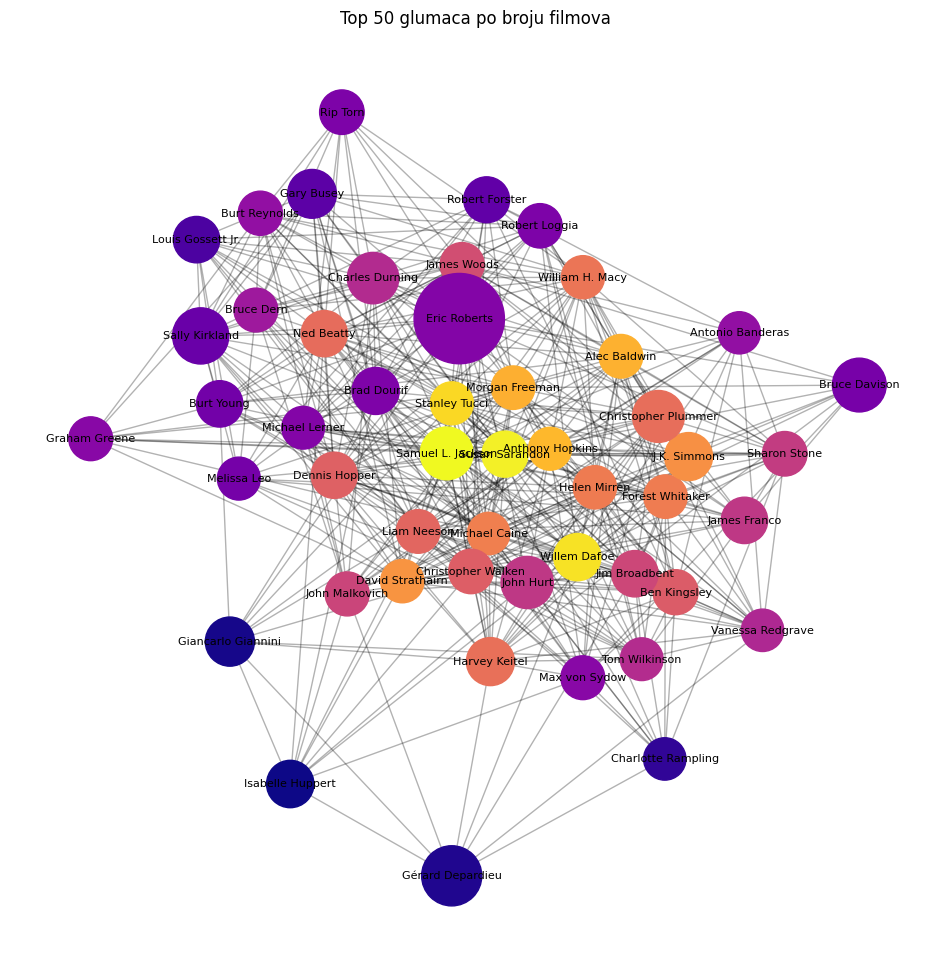

In [107]:
# Podgraf sa top 50 glumaca po broju filmova
top_actors_films = sorted(G.nodes, key=lambda n: G.nodes[n].get('num_films', 0), reverse=True)[:50]
G_top_50_films = G.subgraph(top_actors_films)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G_top_50_films, seed=42, k=0.3)

node_sizes = [60 + 8*G.nodes[a].get('num_films', 0) for a in G_top_50_films.nodes()]
node_colors = [eigenvector_centrality.get(a, 0.1) for a in G_top_50_films.nodes()]

nx.draw_networkx_nodes(G_top_50_films, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma)
nx.draw_networkx_edges(G_top_50_films, pos, alpha=0.3)
nx.draw_networkx_labels(G_top_50_films, pos, font_size=8)
plt.title("Top 50 glumaca po broju filmova")
plt.axis('off')
plt.show()

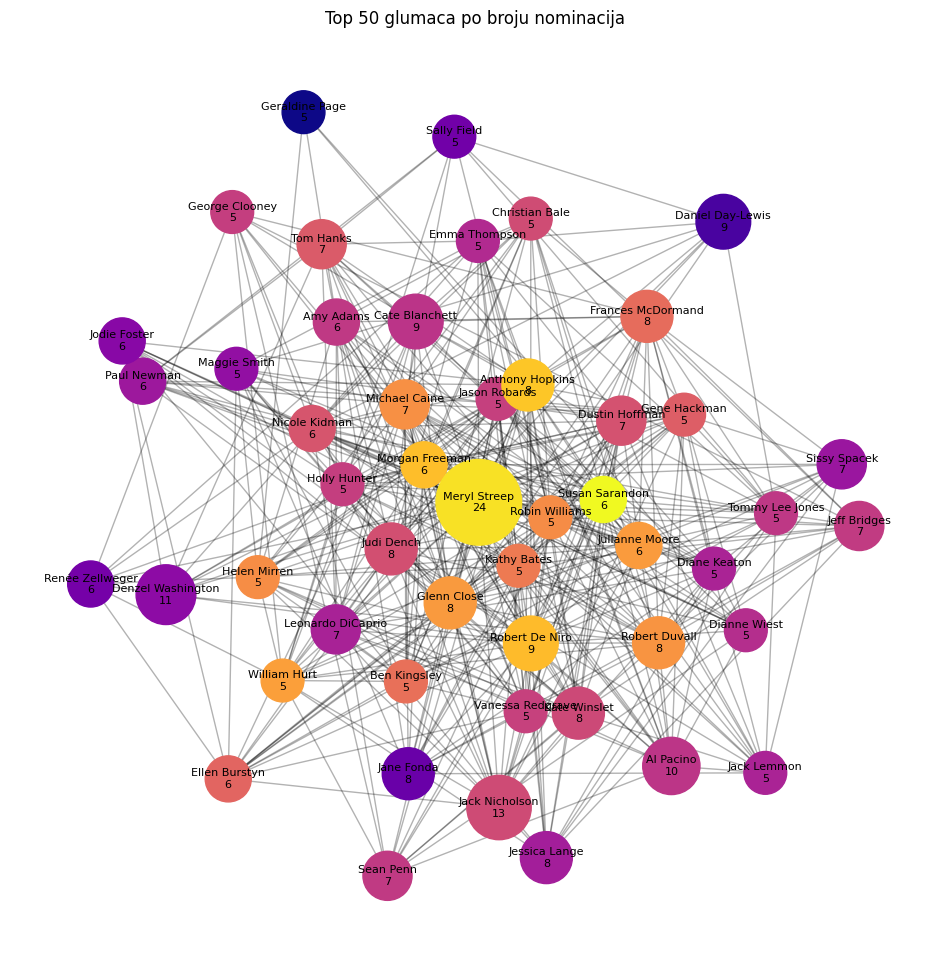

In [108]:
# Podgraf sa top 50 glumaca po broju nominacija
top_actors_nom = sorted(G.nodes, key=lambda n: G.nodes[n].get('num_nominations', 0), reverse=True)[:50]
G_top_50_noms = G.subgraph(top_actors_nom)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G_top_50_noms, seed=42, k=2.0)

node_sizes = [200 + 150*G.nodes[a].get('num_nominations', 0) for a in G_top_50_noms.nodes()]
node_colors = [eigenvector_centrality.get(a, 0.1) for a in G_top_50_noms.nodes()]
labels = {a: f"{a}\n{G.nodes[a]['num_nominations']}" for a in G_top_50_noms.nodes()}

nx.draw_networkx_nodes(G_top_50_noms, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma)
nx.draw_networkx_edges(G_top_50_noms, pos, alpha=0.3)
nx.draw_networkx_labels(G_top_50_noms, pos, labels=labels, font_size=8)
plt.title("Top 50 glumaca po broju nominacija")
plt.axis('off')
plt.show()

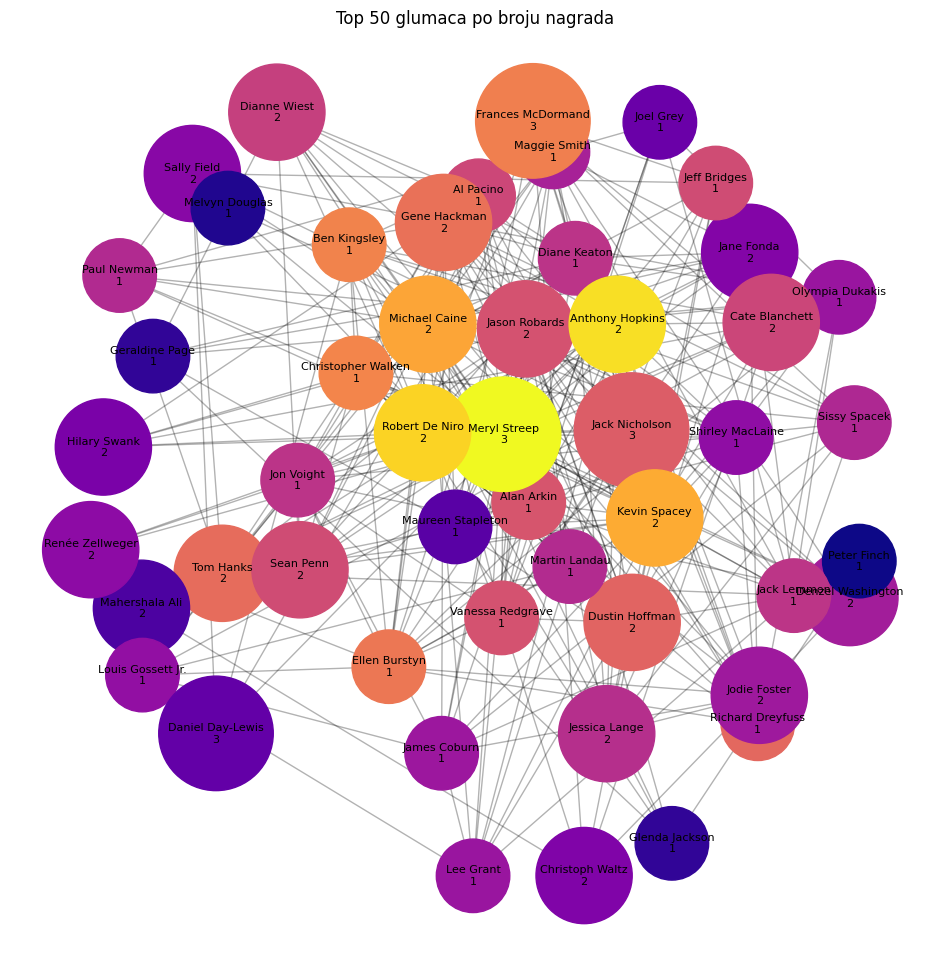

In [109]:
# Podgraf sa top 50 glumaca po broju nagrada
top_actors_awards = sorted(G.nodes, key=lambda n: G.nodes[n].get('num_awards', 0), reverse=True)[:50]
G_top_50_awards = G.subgraph(top_actors_awards)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G_top_50_awards, seed=42, k=2.0)

node_sizes = [800 + 2000*G.nodes[a].get('num_awards', 0) for a in G_top_50_awards.nodes()]
node_colors = [eigenvector_centrality.get(a, 0.1) for a in G_top_50_awards.nodes()]
labels = {a: f"{a}\n{G.nodes[a]['num_awards']}" for a in G_top_50_awards.nodes()}

nx.draw_networkx_nodes(G_top_50_awards, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma)
nx.draw_networkx_edges(G_top_50_awards, pos, alpha=0.3)
nx.draw_networkx_labels(G_top_50_awards, pos, labels=labels, font_size=8)
plt.title("Top 50 glumaca po broju nagrada")
plt.axis('off')
plt.show()

<h4>Filtriranje saradnji</h4>

Za potrebe analize zadržane su samo jače veze između glumaca, tj. one koje ukazuju na intenzivniju i dugoročniju saradnju. Prag je određen na osnovu distribucije težina konekcija. Kao kriterijum uzet je <b>99. percentil</b> broja saradnji, što znači da su prikazane samo one veze koje spadaju u gornjih 1% po intenzitetu. Na taj način graf obuhvata najčešće i najznačajnije profesionalne saradnje, dok se ređe saradnje izostavljaju radi preglednosti.

In [110]:
import numpy as np
weights_f = [d['weight'] for _,_,d in G.edges(data=True)]
threshold = np.percentile(weights_f, 99)
print("Prag saradnje:", threshold)

Prag saradnje: 4.0


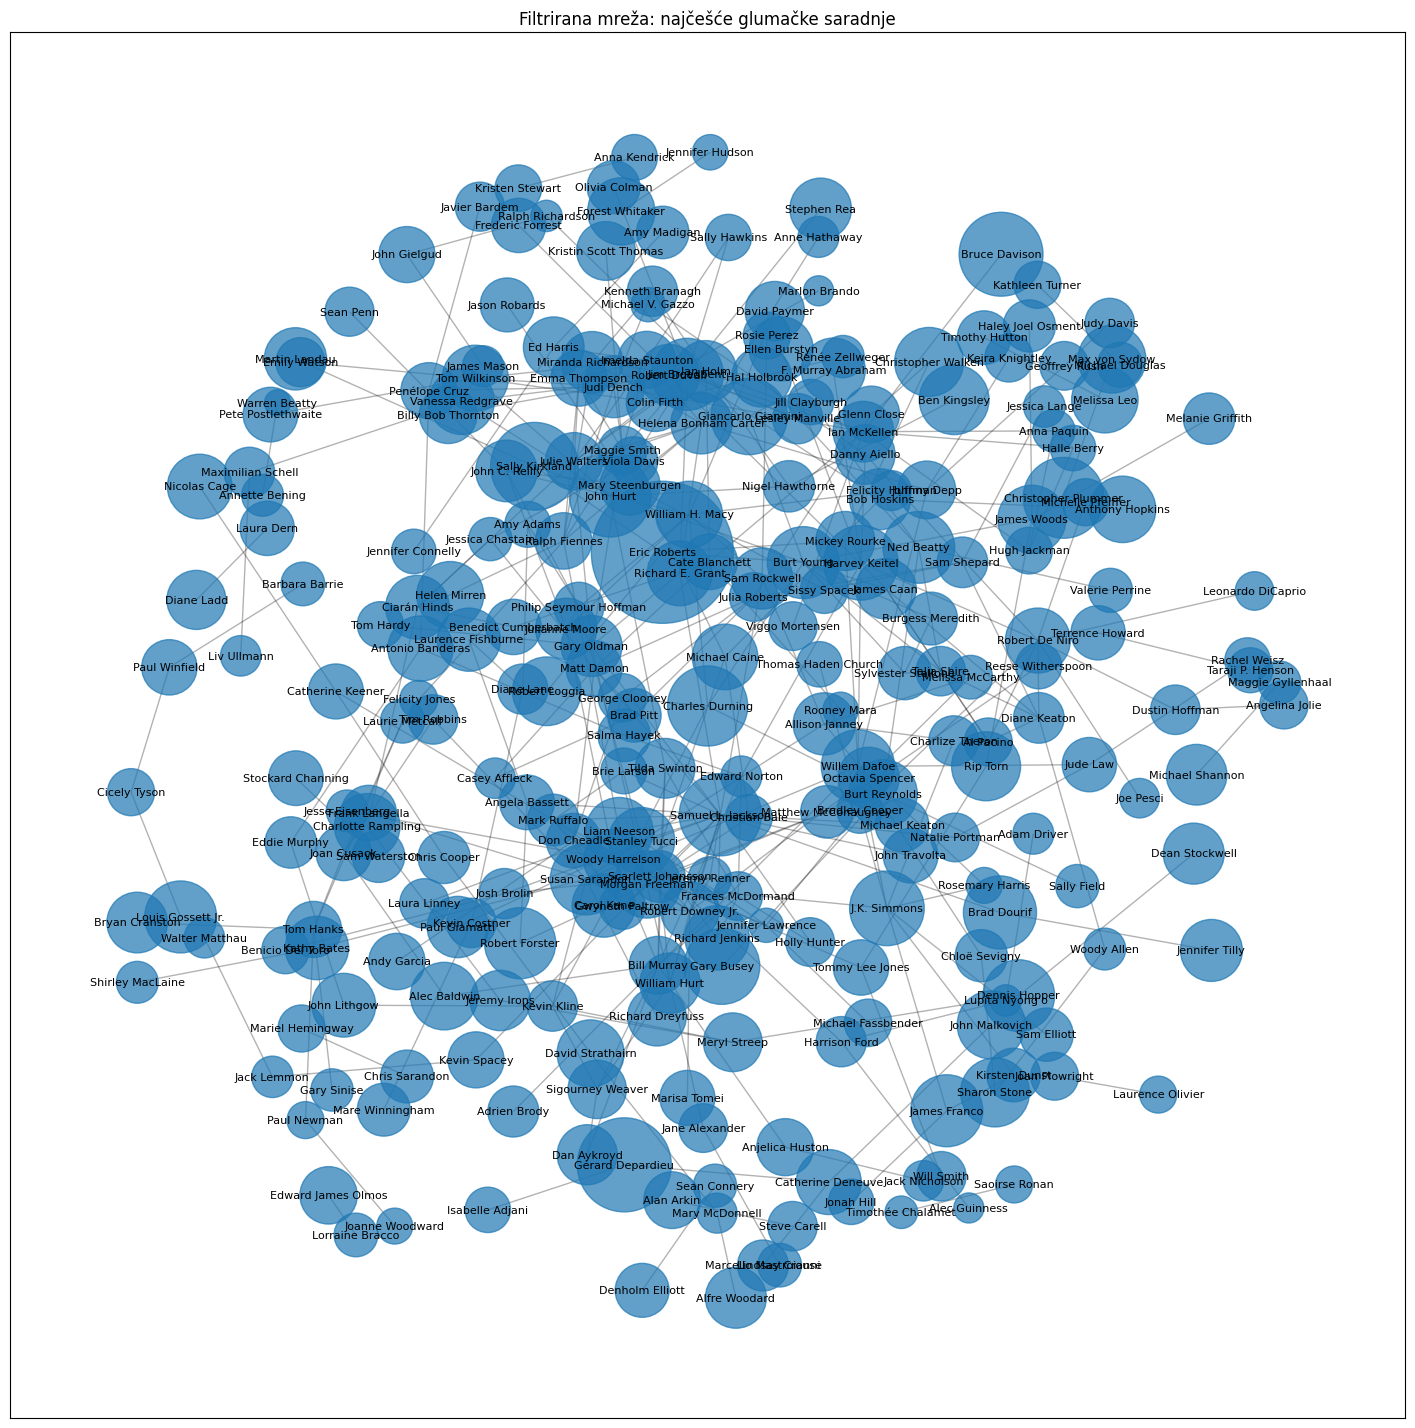

In [111]:
edges_to_keep = [(u,v) for u,v,d in G.edges(data=True) if d['weight'] >= threshold]
G_filtered = nx.Graph()
G_filtered.add_edges_from(edges_to_keep)

plt.figure(figsize=(18,18))
pos_f = nx.spring_layout(G_filtered, seed=42, k=0.25)
node_sizes = [50 + 20*G.nodes[a].get('num_films', 0) for a in G_filtered.nodes()]
nx.draw_networkx_nodes(G_filtered, pos_f, node_size=node_sizes, alpha=0.7)
nx.draw_networkx_edges(G_filtered, pos_f, alpha=0.3)
nx.draw_networkx_labels(G_filtered, pos_f, font_size=8)
plt.title("Filtrirana mreža: najčešće glumačke saradnje")
plt.show()

<h3>Detekcija zajednica (Community Detection)</h3>

Umesto proizvoljnog definisanja klastera na osnovu broja filmova, nagrada i sličnih atributa, primenjen je algoritam za detekciju zajednica. Ovaj algoritam identifikuje grupe na osnovu stvarne strukture veza u mreži.
Korišćen je `Louvain metod`, popularan algoritam za pronalaženje particije mreže maksimizirajući "modularnost", meru koja pokazuje koliko su veze unutar zajednica guste u poređenju sa vezama između različitih zajednica. Ovim pristupom identifikovane su prirodne grupe glumaca koji intenzivno sarađuju međusobno.

In [112]:
# Primena Louvain algoritma na najvećoj povezanoj komponenti (LCC)
communities = nx.community.louvain_communities(G, seed=42)
num_communities = len(communities)
print(f"Pronađeno je {num_communities} zajednica u najvećoj komponenti.")

# Sortiranje zajednica po veličini
communities = sorted(communities, key=len, reverse=True)
print("Veličina top 5 najvećih zajednica:")
for i, community in enumerate(communities[:5]):
    print(f"  Zajednica {i+1}: {len(community)} članova")

Pronađeno je 5 zajednica u najvećoj komponenti.
Veličina top 5 najvećih zajednica:
  Zajednica 1: 211 članova
  Zajednica 2: 161 članova
  Zajednica 3: 112 članova
  Zajednica 4: 50 članova
  Zajednica 5: 12 članova


In [113]:
community_data = []

for i, community in enumerate(communities):
    subgraph = G.subgraph(community)
    
    # Strukturne metrike
    size = len(subgraph)
    density = nx.density(subgraph)
    avg_degree = sum(dict(subgraph.degree()).values()) / size
    
    # Atributi glumaca
    num_films = [subgraph.nodes[n].get('num_films', 0) for n in subgraph.nodes()]
    num_nominations = [subgraph.nodes[n].get('num_nominations', 0) for n in subgraph.nodes()]
    num_awards = [subgraph.nodes[n].get('num_awards', 0) for n in subgraph.nodes()]
    
    avg_films = sum(num_films) / size
    avg_nominations = sum(num_nominations) / size
    avg_awards = sum(num_awards) / size
    
    # Top glumci po atributima
    top_films_actor = max(subgraph.nodes(), key=lambda n: subgraph.nodes[n].get('num_films', 0))
    top_nominations_actor = max(subgraph.nodes(), key=lambda n: subgraph.nodes[n].get('num_nominations', 0))
    top_awards_actor = max(subgraph.nodes(), key=lambda n: subgraph.nodes[n].get('num_awards', 0))
    
    community_data.append({
        "Community": i+1,
        "Size": size,
        "Density": round(density, 3),
        "Avg_Degree": round(avg_degree, 2),
        "Avg_Num_Films": round(avg_films, 2),
        "Avg_Num_Nominations": round(avg_nominations, 2),
        "Avg_Num_Awards": round(avg_awards, 2),
        "Top_Films_Actor": top_films_actor,
        "Top_Nominations_Actor": top_nominations_actor,
        "Top_Awards_Actor": top_awards_actor
    })

# Pretvaranje u DataFrame radi preglednosti
df_communities = pd.DataFrame(community_data)
df_communities

Community  Size  Density  Avg_Degree  Avg_Num_Films  Avg_Num_Nominations  \
0          1   211    0.155       32.47          59.86                 1.98   
1          2   161    0.232       37.14          60.94                 2.23   
2          3   112    0.244       27.07          64.73                 2.21   
3          4    50    0.441       21.60          66.28                 2.86   
4          5    12    0.394        4.33          78.08                 1.33   

   Avg_Num_Awards    Top_Films_Actor Top_Nominations_Actor   Top_Awards_Actor  
0            0.33       Eric Roberts        Jack Nicholson     Jack Nicholson  
1            0.39  Samuel L. Jackson     Denzel Washington  Frances McDormand  
2            0.34          John Hurt      Daniel Day-Lewis   Daniel Day-Lewis  
3            0.48     Susan Sarandon          Meryl Streep       Meryl Streep  
4            0.17   Gérard Depardieu         Jean Dujardin      Jean Dujardin

Primena Louvain algoritma na najvećoj povezanoj komponenti mreže saradnje glumaca (tj. na celom grafu) identifikovala je ukupno pet zajednica različitih veličina i gustina. Najveća zajednica obuhvata 211 članova i karakteriše je relativno niska gustina veza (0.155), što ukazuje na široku, ali retku međusobnu saradnju među članovima. 

S druge strane, manje zajednice, poput zajednica sa 50 i 12 članova, imaju znatno veću gustinu (0.441 i 0.394), što sugeriše intenzivniju saradnju i kohezivnije grupe. 

Analiza atributa glumaca unutar zajednica pokazuje da, iako velike zajednice sadrže značajan broj članova, prosečan broj osvojenih nagrada i nominacija po glumcu je niži u poređenju sa manjim, gušćim zajednicama. Na primer, zajednica sa 50 članova ima najveći prosečan broj nominacija (2.86) i nagrada (0.48) po članu, dok zajednica sa 12 članova broji najviše filmova po glumcu (78.08).

Takođe, identifikovani su najistaknutiji glumci po različitim kriterijumima, kao što su broj filmova, nominacija i osvojenih nagrada, što omogućava uvid u ključne aktere i lidere unutar svake zajednice. Ovi rezultati potvrđuju postojanje prirodnih grupa glumaca koji intenzivno sarađuju.

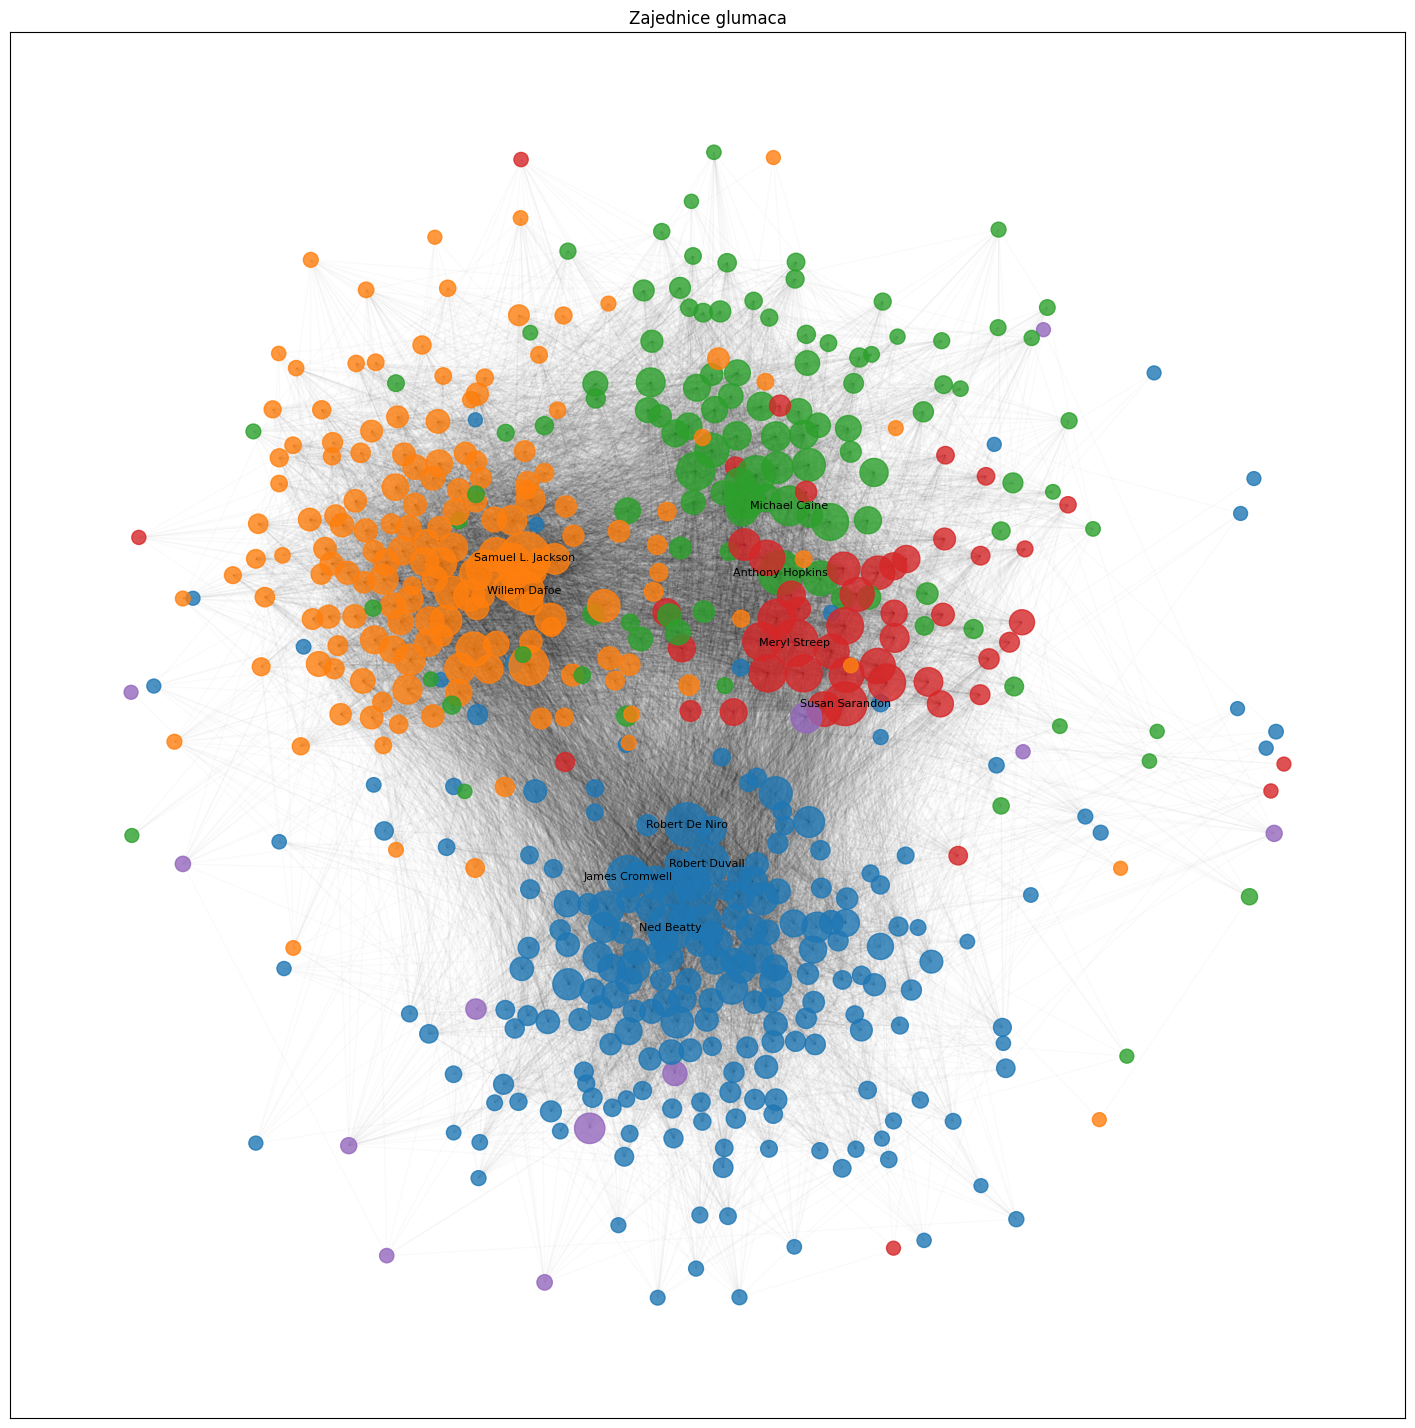

In [117]:
bc = nx.betweenness_centrality(G)
node_sizes = [100 + 100000*bc[n] for n in G.nodes()]

node_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_community[node] = i

colors = plt.cm.tab10.colors
node_colors = [colors[node_community[n] % 5] for n in G.nodes()]

top_bc_nodes = [n for n, _ in sorted(bc.items(), key=lambda x: x[1], reverse=True)[:10]]

labels = {n: n if n in top_bc_nodes else "" for n in G.nodes()}

for u, v in G.edges():
    if node_community[u] == node_community[v]:
        G[u][v]['weight'] = 10
    else:
        G[u][v]['weight'] = 1

pos = nx.spring_layout(G, seed=42, k=1.3, weight='weight')

plt.figure(figsize=(18,18))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.02)
nx.draw_networkx_labels(G, pos, labels, font_size=8)
plt.title("Zajednice glumaca")
plt.show()

<h4>Vizualizacija zajednica</h4>

Na grafu su prikazane <b>zajednice glumaca</b> gde:
- <b>Boja čvorova označava zajednicu</b> kojoj glumac pripada,
- <b>Veličina čvora zavisi od betweenness centality vrednosti</b> što znači da veće čvorove imaju oni glumci koji imaju važniju ulogu u povezivanju različitih delova mreže
- <b>Labele su prikazane samo za top brokere</b> tj. glumce sa najvećim betweenness centrality vrednostima jer upravo oni najviše povezuju zajednice u mreži.

In [115]:
top_bc = sorted(bc.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 glumaca po betweenness centrality (brokeri između zajednica):")
for actor, centrality in top_bc:
    community = node_community[actor]
    print(f"{actor} - zajednica {community}, betweenness: {centrality:.4f}")

Top 10 glumaca po betweenness centrality (brokeri između zajednica):
Samuel L. Jackson - zajednica 1, betweenness: 0.0126
Meryl Streep - zajednica 3, betweenness: 0.0106
Ned Beatty - zajednica 0, betweenness: 0.0102
Anthony Hopkins - zajednica 2, betweenness: 0.0092
Robert Duvall - zajednica 0, betweenness: 0.0090
Robert De Niro - zajednica 0, betweenness: 0.0089
Susan Sarandon - zajednica 3, betweenness: 0.0089
James Cromwell - zajednica 0, betweenness: 0.0080
Willem Dafoe - zajednica 1, betweenness: 0.0073
Michael Caine - zajednica 2, betweenness: 0.0071


In [116]:
data = []
for actor, centrality in top_bc:
    community = node_community[actor]
    attrs = G.nodes[actor]
    data.append({
        "Glumac": actor,
        "Zajednica": community,
        "Betweenness": centrality,
        "Broj filmova": attrs['num_films'],
        "Nominacije": attrs['num_nominations'],
        "Oskari": attrs['num_awards']
    })

df_brokeri = pd.DataFrame(data)
print(df_brokeri)

              Glumac  Zajednica  Betweenness  Broj filmova  Nominacije  Oskari
0  Samuel L. Jackson          1     0.012590           173           1       0
1       Meryl Streep          3     0.010558            87          24       3
2         Ned Beatty          0     0.010188           131           1       0
3    Anthony Hopkins          2     0.009191           112           8       2
4      Robert Duvall          0     0.009001            94           8       1
5     Robert De Niro          0     0.008949           107           9       2
6     Susan Sarandon          3     0.008861           130           6       1
7     James Cromwell          0     0.008018           103           1       0
8       Willem Dafoe          1     0.007265           137           3       0
9      Michael Caine          2     0.007103           109           7       2


Na osnovu betweenness centrality metrike, izdvojeni su sledeći glumci:

1. `Samuel L. Jackson` (zajednica 1) predstavlja tipičnog "bridge" glumca jer se pojavio u velikom broju filmova. Njegova uloga u povezivanju različitih zajednica dolazi iz žanrovske raznovrsnosti, od autorskih filmova do blockbustera, što mu omogućava da povezuje glumce iz različitih krugova.
2. `Meril Streep` (zajednica 3) je centralna figura u svojoj zajednici s obzirom na njenu višedecenijsku karijeru.
3. `Ned Beatty` (zajednica 0) iako nije poznat široj publici u poređenju sa ostalima, pojavljivao se u velikom broju filmova i time ostvario veze sa raznovrsnim zajednicama. On je primer "skrivenog brokera" tj. nije najpoznatiji, ali ima značajnu strukturalnu ulogu.
4. `Anthony Hopkins` (zajednica 2) njegova karijera obuhvata razne epohe i žanrove, pa se prirodno nalazi kao spojnica izneđu različitih grupa.
5. `Robert Duvall` (zajednica 0) jedan od starijih glumaca koji povezuje starije generacije glumaca sa novim.
6. `Robert De Niro` (zajednica 0) njegova mrežna pozicija oslikava dugu i raznovrsnu karijeru, koja obuhvata saradnje sa mnogim poznatim glumcima i rediteljima.
7. `Susan Sarandon` (zajednica 3) njen dugogodišnji rad u industriji naglašava raznovrsnost uloga koje spajaju različite krugove glumaca.
8. `James Cromwell` (zajednica 0) predstavlja još jednog "tihog brokera" čija karijera obuhvata širok spektar žanrova.
9. `Willem Dafoe` (zajednica 1) poznat po raznovrsnim i često nekonvencionalnim ulogama, radi i u komercijalnim i u umetničkim filmovima. Ta kombinacija mu daje poziciju mosta između “mainstream” i alternativnijih zajednica.
10. `Michael Caine` (zajednica 2) sa karijerom koja traje više decenija i obuhvata različite talase britanske i američke kinematografije.